# Going Through the Tutorial on Deep Learning from @deeplizard on YouTube

<hr/>

@since 2023-02-06 ; With a new log for `conda` use @since 2023-02-18

<hr/>

## Not worrying about data (since she usually just talks about another video where you can find it). Focusing on code framework.

I hope that's cool with me. Yep, it is; I checked.

<hr/>

## Very Beginning Stuff

Using Windows (on our home Lappy) to get started.

Intro to Deep Learning Playlist<br/>
https://youtube.com/playlist?list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU

Now that I'm on YouTube, I can see that the title, author, and description of the playlist.

**Deep Learning Fundamentals - Intro to Neural Networks**<br/>
**deeplizard**<br/>
_38 videos_<br/>
This series explains concepts that are fundamental to deep learning and artificial neural networks for beginners. In addition to covering these concepts, we also show how to implement some of the concepts in code using Keras, a neural network API written in Python. We will learn about layers in an artificial neural network, activation functions, backpropagation, convolutional neural networks (CNNs), data augmentation, transfer learning and much more!

Installing Python and Jupyter Notebook<br/>
https://medium.com/@kswalawage/install-python-and-jupyter-notebook-to-windows-10-64-bit-66db782e1d02

_Note that I use `conda` this time, so the Python installation isn't too important. It's actually unnecessary for the tutorial. It's not too bad to know that I installed it, though._

<br/>
<strike>
_Note that I didn't do the lengthening of MAX_PATH, nor did I put the install in a nicer place. I'll live with it._

_Later note 2023-02-09: I couldn't live with it - it wouldn't let me install TensorFlow. I'll be adding details on getting the longer path.<br/>I'm actually going to rename this notebook, take out the just-python try, and do conda (so there isn't so much superfluous output, and so I can do it more easily next time.)_
</strike>
<br/>

_This is the new one, starting 2023-02-18_

This time, I'll show how `conda` and other stuff were taken care of.

<hr/>

### Some preliminary, instruction-finding sources

https://geekflare.com/install-tensorflow-on-windows-and-linux/

miniconda and pip
<br/>https://docs.conda.io/en/latest/miniconda.html
<br/>https://stackoverflow.com/questions/48720833/could-not-find-a-version-that-satisfies-the-requirement-tensorflow
<br/>https://www.tensorflow.org/install/pip#windows-native

https://superuser.com/questions/1119883/windows-10-enable-ntfs-long-paths-policy-option-missing
<br/>https://superuser.com/questions/1018145/windows-starter-edition-home-and-home-premium-do-not-include-gpedit-how-do-i-i
<br/>Okay, need to change it.

Followed the instructions from
<br/>https://superuser.com/a/1229992/908741
<br/>https://superuser.com/questions/1018145/windows-starter-edition-home-and-home-premium-do-not-include-gpedit-how-do-i-i#comment1933601_1229992
<br/>https://superuser.com/questions/1018145/windows-starter-edition-home-and-home-premium-do-not-include-gpedit-how-do-i-i#comment2201029_1229992

_Note there is a quicker way than what's here in the first quote; look at the first comment below to use that quicker way._

> Windows (at least Windows 10 home) comes with Group Policy Editor packages, but it is disabled by default. You can install it just like any other optional feature using `dism`.
> 
> The Group Policy package files can be found in <br/>
>`%SystemRoot%\servicing\Packages`
> 
> With filenames matching <br/>
> `Microsoft-Windows-GroupPolicy-ClientExtensions-Package*.mum`<br/>
>`Microsoft-Windows-GroupPolicy-ClientTools-Package*.mum`
> 
> And command for installing would follow the following format:
> 
> `dism /online /norestart /add-package:"%SystemRoot%\servicing\Packages\{{PackageFileName}}"`
> 
> `/online` used to tell it to apply to the running OS
> `/norestart` tells it to not auto reboot
> 
> After installing these `gpedit.msc` will be available. No need to download an external executable that you have to trust or find out if it is safe or not.

'-------------------------------------------

#### (Comments below)

##### [What I used for enabling long paths (I think with admin)]

> Here is for those impatient <br/> `for /f "tokens=*" %G IN ('dir /b "%SystemRoot%\servicing\Packages\Microsoft-Windows-GroupPolicy-Client*.mum"') do (dism /online /norestart /add-package:"%SystemRoot%\servicing\Packages\%G")`

'-------

> After installing the packages, if you look at the DISM log, you will see that a reboot was required, but was suppressed with `/norestart`. For me, `gpedit.msc` did not appear under `c:\windows\system32` until after I rebooted.

**I had to reboot!**

'-----------------------

Then instructions
<br/>https://superuser.com/a/1119980/908741
<br/>https://superuser.com/q/1119883/908741
<br/>For both `a > b > c > ...` things described.

> The web is full of articles, describing what should be done. <br/>
> 1.	Hit the <kbd>Windows</kbd> key, type `gpedit.msc` and press <kbd>Enter]</kbd>. <br/>
> 2.	Navigate to <br/>
> `Local Computer Policy > Computer Configuration > Administrative Templates > System > Filesystem > NTFS`. <br/>
> 3.	Double click the `Enable NTFS` long paths option and enable it.

and

> The value has moved from NTFS directly into `Local Computer Policy > Computer Configuration > Administrative Templates > System > Filesystem` in the RTM version of the Version 1607.

So, I enabled the long paths by doing <kbd>Win</kbd> + <kbd>R</kbd>, typing `gpedit.msc`, pressing <kbd>Enter</kbd>, and then clicking whatever allowed enabling long paths through both
<br/>`Local Computer Policy > Computer Configuration > Administrative Templates > System > Filesystem > NTFS`
<br/>and
<br/>`Local Computer Policy > Computer Configuration > Administrative Templates > System > Filesystem`

<hr/><hr/>

<hr/>

## Initial setup. 

I'm not showing output for a good part of the commands. Near the end, there might be a cell or cells with the full I/O. I might figure out how to put hyperlinks in here, I might not.

Here are all the commands with minimal output. I'll put some more output and notes below in the _More I/O_ section and the _All I/O_ sections.

<hr/>

`Anaconda Prompt (miniconda3)`

```
(base) C:\Users\bballdave025>
```

Just commands, but note instructions at https://www.purdue.edu/science/scienceit/ssh-keys-windows.html

```
conda info --envs
ssh-keygen
type .\.ssh\id_rsa.pub
```

Some I/O

```
(base) C:\Users\bbaldave025l>conda info --envs
# conda environments:
#
base                  *  C:\Users\bballdave025\miniconda3

>ssh-keygen
Generating public/private rsa key pair.
Enter file in which to save the key (C:\Users\bballdave025/.ssh/id_rsa):
Created directory 'C:\Users\bballdave025/.ssh'.
Enter passphrase (empty for no passphrase):
Enter same passphrase again:
Your identification has been saved in C:\Users\bballdave025/.ssh/id_rsa.
Your public key has been saved in C:\Users\bballdave025/.ssh/id_rsa.pub.
The key fingerprint is:
SHA256:███████████████████████████████████████████ bballdave025@MY-MACHINE
The key's randomart image is:
+---[RSA 3072]----+
| ██   ██   █████ |
| ██   ██     █   |
| ██   ██     █   |
| HHHHHHH     █   |
| ███████     I   |
| ██   ██     █   |
| ██   ██     █ hi|
| ██   ██     █   |
| ██   ██   █████ |
+----[SHA256]-----+

>type .\.ssh\id_rsa.pub
ssh-rsa ███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████= bballdave025@MY-MACHINE
```

Copy and paste the output (the contents of `.\.ssh\id_rsa.pub`) to my github

Now, seeing

```
(base) C:\Users\bballdave025>
```

Just commands

```
cd C:\David
mkdir my_repos_dwb
cd my_repos_dwb
git clone git@github.com:bballdave025/courses_tutorials_etc.git
```

Some I/O

```
C:\David\my_repos_dwb>git clone git@github.com:bballdave025/courses_tutorials_etc.git
Cloning into 'courses_tutorials_etc'...
The authenticity of host 'github.com (140.82.112.4)' can't be established.
ECDSA key fingerprint is SHA256:p2QAMXNIC1TJYWeIOttrVc98/R1BUFWu3/LiyKgUfQM.
Are you sure you want to continue connecting (yes/no/[fingerprint])? yes
Warning: Permanently added 'github.com,140.82.112.4' (ECDSA) to the list of known hosts.
Enter passphrase for key '/c/Users/bballdave025/.ssh/id_rsa':
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 25 (delta 7), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (25/25), 33.46 KiB | 329.00 KiB/s, done.
Resolving deltas: 100% (7/7), done.
C:\David\my_repos_dwb>
```

Just commands

```
cd courses_tutorials_etc
cd dl_fundamentals_deeplizard
dir
```

Some I/O

```
(base) C:\David\my_repos_dwb\courses_tutorials_etc\dl_fundamentals_deeplizard>dir
 Volume in drive C is Windows-SSD
 Volume Serial Number is ████-████

 Directory of C:\David\my_repos_dwb\courses_tutorials_etc\dl_fundamentals_deeplizard

02/18/2023  12:21 PM    <DIR>          .
02/18/2023  12:21 PM    <DIR>          ..
02/18/2023  12:21 PM            90,904 Intro_to_Deep_Learning_deeplizard_start_2023-02-06.ipynb
02/18/2023  12:21 PM    <DIR>          other_directions
02/18/2023  12:21 PM               155 README.md
               2 File(s)         91,059 bytes
               3 Dir(s)  17,009,586,176 bytes free
```

Just commands

```
:: note my directory
dir | findstr Directory
conda info --envs
```

Some I/O

```
>dir | findstr Directory
 Directory of C:\David\my_repos_dwb\courses_tutorials_etc\dl_fundamentals_deeplizard

>conda info --envs
# conda environments:
#
base                  *  C:\Users\bballdave025\miniconda3

```

Just commands

```
conda create --name "intro_deep_learning" python=3.8
conda activate intro_deep_learning
```

And I see that the command prompt looks like the following

```
(intro_deep_learning) C:\David\my_repos_dwb\courses_tutorials_etc\dl_fundamentals_deeplizard>
```

I'm going to install packages before setting up my Jupyter Notebook.

(The command for Jupyter Notebook, `jupyter notebook` will eventually give me the following result.)

It automatically took me right where I needed to go:<br/>
http://localhost:8888/tree<br/>
I could have found that from the comments, but there's no need, now.
<hr/>

Oh, and goodness! I prefer the command-line without any IDEs. I can code from the `>>>` and know that what I use can go right into any scripts or more OO code.
<hr/>

<hr/>

## Packages to install

```CMD
pip install numpy
pip install matplotlib
pip install scipy
pip install opencv-python
pip install imageio
pip install scikit-learn
pip install nbconvert[qtpdf]
pip install pandoc
```

Don't do the following (it's crossed out) <strike>`pip install keras`</strike>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`#` Do or check $\mu$Soft Visual C++ redistributables download - see the notes from Video 1.

```cmd
pip install tensorflow
```

I don't know if all of those will be needed, especially `matplotlib` and `opencv` (maybe `scipy` as well), but I know they're useful in general.

### The following packages are specific to my use of Jupyter Notebook 

```
# Needed just to print to PDF or to preview to HTML 
#+ and then Print to PDF
# nbconvert[qtpdf]
# pandoc
```

I've probably missed some packages that will be needed for running the tutorial. I'll leave some space here for listing them.

```CMD
## Things that I didn't install that ended up being needed.
# scikit-learn
# imageio

```

I'll come back to install `scikit-learn`, `pytorch`, and some other stuff, later. Actually, maybe not even during this tutorial, unless they come up. (I don't even know if 'cuda', etc. have packages in Python.)

<hr/><hr/>

<hr/>

## Starting the Tutorial

<hr/>

<hr/>

### Video/Lesson 01: Deep Learning playlist overview & Machine Learning intro

Putting in the playlist part of the URL for this first lesson<br/>
https://www.youtube.com/watch?v=gZmobeGL0Yg&list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU&index=1

https://www.youtube.com/watch?v=gZmobeGL0Yg

In [1]:
print("No code here. Enjoy your paradox.")

No code here. Enjoy your paradox.


2023-02-08

#### Notes

Description of Playlist. Some implementation, but not tons of code or everything you need (data, e.g.). Using Keras. She informs us that the info about what you need to install is at another list.

https://youtube.com/playlist?list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL
<br/>Deep Learning with Keras and TensorFlow

https://youtu.be/tDaGT4N4aCA
<br/>Prerequisites, notes that _Keras by itself is no longer maintained_, so you _just install TensorFlow_ (after Visual Studio redistributables are downloaded)

https://youtu.be/IubEtS2JAiY
<br/>Setting up CUDA GPU; notes that you need C++ redistributables and MS Visual Studio Community

Checked for the redistributables via PowerShell. I have them, but if I didn't have them, the place to go would be

https://learn.microsoft.com/en-us/cpp/windows/latest-supported-vc-redist?view=msvc-170#visual-studio-2015-2017-2019-and-2022

The actual commands, etc. for doing these things is included in the _Packages to Install_ section.

2023-02-23

Machine Learning _uses_ the data to become able to do the task. No explicit telling the computer how to do it.

Sentiment Analysis
Rule-based program: Give the program words that are positive, others that are negative, etc.
Machine learning program: Algorithm is given large amounts of data and learns which are positive and negative.

Both could decide whether a new article is positive or negative.

Conclusion:
ML consists of using algorithms to: 1) Analyze data; 2) Learn from that data; 3) Make a determination or prediction about new data.

<hr/><hr/>

### Video/Lesson 02: Deep Learning explained 

https://www.youtube.com/watch?v=OT1jslLoCyA

In [2]:
print("Code entry here.")

Code entry here.
Code entry here.


#### Notes

2023-02-23

What is Deep Learning? We'll start discussing it.

This video: most basic idea about what deep learning is and how it's used.

Deep Learning = Subfield of ML that use as a model structure and function of the human brain's neural networks. We have **artificial neural networks**.

Supervised (from labeled) vs unsupervised (without labels).

"Neural net", "net", "model": all refer to Artificial Neural Networks

<hr/><hr/>

### Video/Lesson 03: Artificial Neural Networks explained

https://www.youtube.com/watch?v=hfK_dvC-avg

In [3]:
# 2023-02-23

from keras.models import Sequential
from keras.layers import Dense, Activation

n_neurons_in_hidden_layer = 32         # number of nodes 
                                       #+ or neurons in 
                                       #+ our layer
n_features_input_to_hidden = 10       # shape of data 
                                       #+ passed (that 
                                       #+ we're passing 
                                       #+ into our model
my_activation_function_hidden = "relu" # typically a 
                                       #+ nonlinear 
                                       #+ function that  
                                       #+ follows a 
                                       #+ dense layer
n_neurons_in_output_layer = 2          # number of 
                                       #+ neurons in 
                                       #+ (the code's)
                                       #+ second - or 
                                       #+ output - layer
my_activation_function_output_layer = "softmax"
                                       # another
                                       #+ activation
                                       #+ function -
                                       #+ 1) nonlinear
                                       #+ 2) follows a
                                       #+    dense layer

# array of two dense layers passed to the 'Sequential' constructor
model = Sequential([Dense(n_neurons_in_hidden_layer, 
                          input_shape=(n_features_input_to_hidden,),
                          activation=my_activation_function_hidden),
                    Dense(n_neurons_in_output_layer,
                          activation=my_activation_function_output_layer)])

#### Notes

Artificial Neural Networks - Inspired by human brain's neural networks.

Connection of artificial units called artificial neurons. Can exchange and pass on signals.

Input Layer, Output Layer. Others in between are hidden layers.

Image for artificial neural network: She uses something like the image at<br/>
https://www.tutorialspoint.com/artificial_intelligence/images/atypical_ann.jpg

<br/>

<div>
  <img src="https://www.tutorialspoint.com/artificial_intelligence/images/atypical_ann.jpg"
       alt="An image with all inputs connected to all outputs (an actual dense layer)"
       width="300px">
       <!--align="left"-->
</div>

<br/>

<div>

&lt;tangent&gt;

For some reason, I thought that one of the hidden layer nodes was missing one connection to the output layer. Now, I don't see that situation in her image or mine.

In _this_ picture:

https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Neural_network_example.svg/1200px-Neural_network_example.svg.png
    
</div>

<br/>

<div>
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Neural_network_example.svg/1200px-Neural_network_example.svg.png"
       alt="A not-dense layer"
       width="200px">
       <!--align="left"-->
</div>

<br/>

<div>

things aren't fully connected, so it wouldn't be a dense layer (if I understand correctly).

&lt;/tangent&gt;

</div>

Hahaha, working on therapy. TINN for getting her actual screen, even if it would be easy.

Code in the cell above this cell represents the setup of a sequential neural network - one layer after another after another.

Dense layer is most basic used in a neural network - connects all of its inputs to each output.

Below is the code as it appears on her screen.

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(10,), activation="relu"),
    Dense(2, activation="softmax")
])

#### More Notes

I have already been more specific above, in the code after the lesson-title cell. Now, below, I annotate it to highlight the different parameters of the Dense layersnand their characteristics (as their own characteristics and as they compare between the two layers).

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential(
                   [
        #1#  The input layer has 10 neurons and only appears
        #1#+ as a parameter to the `input_shape` parameter.)
        Dense(32, input_shape=(10,         ), activation="relu"),   #2#
                                  #^blank^#                         #2#
        Dense(2,                              activation="softmax") #3#
                 #^blank^#                                          #3#
                    ]
                   )

<hr/><hr/>

### Video/Lesson 04: Layers in a Neural Network explained

https://www.youtube.com/watch?v=FK77zZxaBoI

2023-03-03 : Using TOATC and QAR (The OCD and Anxiety Treatment Center; Quick And Reckless). Minimum required is writing down her code, _maybe_ doing some commentary on the code, and writing notes _after_ the lesson. Praying for help.

By the way, the code from her screen is shown below.

In [6]:
#  Code from her screen. Remember to be in the correct conda env.
#+ Continuing 2023-03-04 (I lost some stuff, but I'll live)
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(5, input_shape=(3,), activation="relu"),
    Dense(2, activation="softmax")
])

`#space`

In [7]:
#  she puts a white rectangle over the top of this
#+ after a first part of the video (?)
import numpy as np
a = np.array([0,0,1,1,1,1,1,1,1,1])
a.shape

(10,)

`#space`

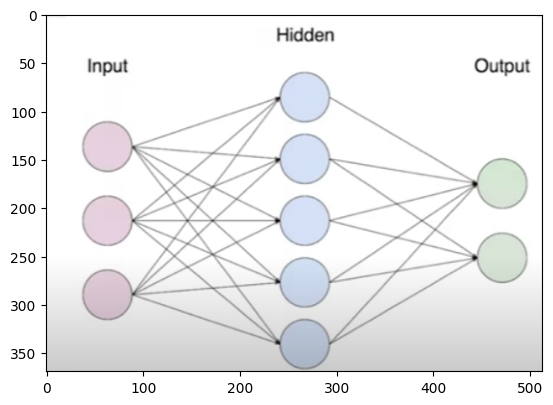

In [8]:
import numpy as np
from scipy import ndimage
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

##1##
## code as on screen
#img = np.expand_dims(ndimage.imread("NN.PNG"), 0)
## error cf. https://stackoverflow.com/a/66632739/6505499
## 
##endof: 1##

# I thought this might create "NN.PNG" (despite `imread`),
#+ but it doesn't. I want to try out the `%matplotlib inline`
#+ magic function (I think I heard it called that), so I'll
#+ save the image of the network as "NN.PNG".
img = np.expand_dims(imageio.v2.imread("NN.PNG"), 0)
plt.imshow(img[0])

List of Layer Types.

- Dense (or fully connected) Layers.<br/>  Possible use:

- Convolutional Layers.<br/>  Possible use: work with image data

- Pooling Layers.<br/>  Possible use:

- Recurrent Layers.<br/>  Possible use: time series data

- Normalization Layers.<br/>  Possible use:

- ... many others ...<br/>

<br/>

Weight on a connection gives the strength of that connection.

Sum of the weights that come to it is computed at the ending node, then passed to an activation function.

Will continually work to optiize weights.

For this one, we could use categories: two nodes, one for cat, one for dog.

<hr/>

Wait, this time she has the image with a not-fully-connected (not dense) layer.

https://www.youtube.com/watch?v=FK77zZxaBoI&time=104s

```
#  Tried using the base-64 representation, from
#+ https://www.base64-image.de/
#+ but that was way too many characters.
#+ this_ref = "https://mljar.com/blog/jupyter-notebook-insert-image/"
#+ this_archived_ref = "https://web.archive.org/web/20230303210702/" + \
#+ "https://mljar.com/blog/jupyter-notebook-insert-image/" 
```

<div>
  <br/>
  <img src="./p01_not_dense__without_annotation.png" 
       alt="A screencap with the offending network; just the image for inspection"
       width="500px">
       <!--align="left"-->
  <br/>
</div>

<br/>

Now, we'll put it the missing connection with a dashed red line.

<div>
  <br/>
  <img src="./p02_not_dense__with_annotation.png"
       alt="A screencap with the offending network; the red, dashed line shows where the missing connection should be"
       width="500px">
       <!--align="left"-->
  <!-- did not work:
       ![A screencap with the offending network; the red, dashed line shows where the missing connection should be](./p02_not_dense__with_annotation.png){width=500px} -->
  <br/>
</div>

<br/>

```
#  For sizing stuff
sizing_ref = "https://stackoverflow.com/questions/" + \
#+           "14675913/changing-image-size-in-markdown" + \
#+           "#comment132190945_14675913"
sizing_archived_ref="https://web.archive.org/web/" + \
                    "20230303212436/https://stackoverflow.com/" + \
                    "questions/14675913/changing-image-size-in-markdown"
```

Anyway, above is her code. We'll see if I get the messed-up image (missing a connection) that she gets.

**2023-03-04**
She describes that we only need to give the input shape to the first layer after our data. That way, the model knows what's coming in. The model will infer the rest of the shape (at least for sequential, as DWB understands it.

From the transcript (far from perfect). Therapy stuff. NOt putting in the punctuation.

> Notice in this next layer we're not putting an input shape that's because only the first layer within the sequential model requires an input shape because our model needs to understand the shape of the data that it's initially going to be dealing with you don't have to specify the shape for the next layers and hidden or output or any other hidden layers that would come in between because the model will be able to infer it's just the initial data being passed into the model for our input that we have to specify the input shape for

In [9]:
#  More comments on parameter-explanation code
#+ from last time with some new things learned.
#+ Notice that numbers are different than those
#+ in this, current lesson

from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential(
                   [
        #1#  The input layer has 10 neurons and only appears
        #1#+ as a parameter to the `input_shape` parameter.)
        Dense(32, input_shape=(10,         ), activation="relu"),   #2#
                                  #^blank^#                         #2#
        Dense(2,                              activation="softmax") #3#
                 #^blank^#                                          #3#
                 #  The shape is only needed for the input;#        #3#
                 #+ the subsequent layers can figure it out#        #3#
                    ]
                   )

In [10]:
# Naming variables for her code.
# Code from her screen. Remember to be in the correct conda env
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(5, input_shape=(3,), activation="relu"),
    Dense(2, activation="softmax")
])

<hr/><hr/>

### Video/Lesson 05: Activation Functions in a Neural Network explained

https://www.youtube.com/watch?v=m0pIlLfpXWE

In [11]:
print("Code entry here.")

Code entry here.


<hr/><hr/>

### Video/Lesson 06: Training a Neural Network explained

https://www.youtube.com/watch?v=sZAlS3_dnk0

In [12]:
print("Code entry here.")

Code entry here.


<hr/><hr/>

### Video/Lesson 07: How a Neural Network Learns explained

https://www.youtube.com/watch?v=_N5kpSMDf4o

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 08: Loss in a Neural Network explained

https://www.youtube.com/watch?v=Skc8nqJirJg

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 09: Learning Rate in a Neural Network explained

https://www.youtube.com/watch?v=jWT-AX9677k

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 10: Train, Test, & Validation Sets explained

https://www.youtube.com/watch?v=Zi-0rlM4RDs

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 11: Predicting with a Neural Network explained

https://www.youtube.com/watch?v=Z0KVRdE_a7Q

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 12: Overfitting in a Neural Network explained

https://www.youtube.com/watch?v=DEMmkFC6IGM

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 13: Underfitting in a Neural Network explained

https://www.youtube.com/watch?v=0h8lAm5Ki5g

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 14: Supervised Learning explained

https://www.youtube.com/watch?v=Quh6x4kG6VY

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 15: Unsupervised Learning explained

https://www.youtube.com/watch?v=lEfrr0Yr684

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 16: Semi-supervised Learning explained

https://www.youtube.com/watch?v=b-yhKUINb7o

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 17: Data Augmentation explained

https://www.youtube.com/watch?v=rfM4DaLTkMs

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 18: One-hot Encoding explained

https://www.youtube.com/watch?v=v_4KWmkwmsU

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 19: Convolutional Neural Networks (CNNs) explained

https://www.youtube.com/watch?v=YRhxdVk_sIs

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 20: Convolutions in Deep Learning - Interactive Demo App

https://www.youtube.com/watch?v=vJiZqZRkIg8

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 21: Visualizing Convolutional Filters from a CNN

https://www.youtube.com/watch?v=cNBBNAxC8l4

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 22: Zero Padding in Convolutional Neural Networks explained

https://www.youtube.com/watch?v=qSTv_m-KFk0

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 23: Max Pooling in Convolutional Neural Networks explained

https://www.youtube.com/watch?v=ZjM_XQa5s6s

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 24: Max Pooling in Deep Learning - Interactive Demo App

https://www.youtube.com/watch?v=kt6iUG0Gfm0

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 25: Backpropagation explained | Part 1 - The intuition

https://www.youtube.com/watch?v=XE3krf3CQls

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 26: Backpropagation explained | Part 2 - The mathematical notation

https://www.youtube.com/watch?v=2mSysRx-1c0

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 27: Backpropagation explained | Part 3 - Mathematical observations

https://www.youtube.com/watch?v=G5b4jRBKNxw

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 28: Backpropagation explained | Part 4 - Calculating the gradient

https://www.youtube.com/watch?v=Zr5viAZGnd

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 29: Backpropagation explained | Part 5 - What puts the "back" in backprop?

https://www.youtube.com/watch?v=xClK__CqZnQ

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 30: Vanishing & Exploding Gradient explained | A problem resulting from backpropagation

https://www.youtube.com/watch?v=qO_NLVjD6zE

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 31: Weight Initialization explained | A way to reduce the vanishing gradient problem

https://www.youtube.com/watch?v=8krd5qKVw-Q

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 32: Bias in an Artificial Neural Network explained | How bias impacts training

https://www.youtube.com/watch?v=HetFihsXSys

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 33: Learnable Parameters in an Artificial Neural Network explained

https://www.youtube.com/watch?v=pg3hJpSopHQ

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 34: Regularization in a Neural Network explained

https://www.youtube.com/watch?v=iuJgyiS7BKM

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 35: Batch Size in a Neural Network explained

https://www.youtube.com/watch?v=U4WB9p6ODjM

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 36: Fine-tuning a Neural Network explained

https://www.youtube.com/watch?v=5T-iXNNiwIs

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 37: Batch Normalization (“batch norm”) explained

https://www.youtube.com/watch?v=dXB-KQYkzNU

In [ ]:
print("Code entry here.")

<hr/><hr/>

### Video/Lesson 38:

**I don't know where I lost a lesson/video, but I think I'll find it when I go through doing code and notes.**

In [ ]:
print("Code entry here.")

<hr/><hr/><hr/>

## Notes as I Go Along

<hr/>



<hr/><hr/>

## Complete I/O

Here are some more-detailed (with output) views of the I/O with the commands prompt (CMD)
<hr/>

### Packages to Install, 2023-02-06

#### Shutting down the Jupyter Notebook with multiple <kbd>Ctrl</kbd> + <kbd>c</kbd> calls.




#### The installs (installations, if you want to be more prescriptively grammatically correct)



<hr/>

### Video/Lesson 1

2023-02-08

##### Gory details of the existence of the executables.

```PowerShell
Windows PowerShell
Copyright (C) Microsoft Corporation. All rights reserved.

Try the new cross-platform PowerShell https://aka.ms/pscore6

PS C:\Users\bballdave025> Get-WmiObject -Class Win32_Product `
                            -Filter "Name LIKE '%Visual C++%'"


IdentifyingNumber : {A250E750-DB3F-40C1-8460-8EF77C7582DA}
Name              : Microsoft Visual C++ 2022 X86 Additional Runtime - 14.32.31326
Vendor            : Microsoft Corporation
Version           : 14.32.31326
Caption           : Microsoft Visual C++ 2022 X86 Additional Runtime - 14.32.31326

IdentifyingNumber : {1D8E6291-B0D5-35EC-8441-6616F567A0F7}
Name              : Microsoft Visual C++ 2010  x64 Redistributable - 10.0.40219
Vendor            : Microsoft Corporation
Version           : 10.0.40219
Caption           : Microsoft Visual C++ 2010  x64 Redistributable - 10.0.40219

IdentifyingNumber : {8122DAB1-ED4D-3676-BB0A-CA368196543E}
Name              : Microsoft Visual C++ 2013 x86 Minimum Runtime - 12.0.40664
Vendor            : Microsoft Corporation
Version           : 12.0.40664
Caption           : Microsoft Visual C++ 2013 x86 Minimum Runtime - 12.0.40664

IdentifyingNumber : {F0C3E5D1-1ADE-321E-8167-68EF0DE699A5}
Name              : Microsoft Visual C++ 2010  x86 Redistributable - 10.0.40219
Vendor            : Microsoft Corporation
Version           : 10.0.40219
Caption           : Microsoft Visual C++ 2010  x86 Redistributable - 10.0.40219

IdentifyingNumber : {53CF6934-A98D-3D84-9146-FC4EDF3D5641}
Name              : Microsoft Visual C++ 2013 x64 Minimum Runtime - 12.0.40664
Vendor            : Microsoft Corporation
Version           : 12.0.40664
Caption           : Microsoft Visual C++ 2013 x64 Minimum Runtime - 12.0.40664

IdentifyingNumber : {38624EB5-356D-4B08-8357-C33D89A5C0C5}
Name              : Microsoft Visual C++ 2022 X64 Additional Runtime - 14.32.31326
Vendor            : Microsoft Corporation
Version           : 14.32.31326
Caption           : Microsoft Visual C++ 2022 X64 Additional Runtime - 14.32.31326

IdentifyingNumber : {37B8F9C7-03FB-3253-8781-2517C99D7C00}
Name              : Microsoft Visual C++ 2012 x64 Additional Runtime - 11.0.61030
Vendor            : Microsoft Corporation
Version           : 11.0.61030
Caption           : Microsoft Visual C++ 2012 x64 Additional Runtime - 11.0.61030

IdentifyingNumber : {54E71599-88E8-4A50-8435-BE40755DB005}
Name              : Microsoft Visual C++ 2017 X86 Debug Runtime - 14.16.27033
Vendor            : Microsoft Corporation
Version           : 14.16.27033
Caption           : Microsoft Visual C++ 2017 X86 Debug Runtime - 14.16.27033

IdentifyingNumber : {FBB6370A-2B31-4E7F-9046-FEC401A98F12}
Name              : Microsoft Visual C++ 2017 X64 Debug Runtime - 14.16.27033
Vendor            : Microsoft Corporation
Version           : 14.16.27033
Caption           : Microsoft Visual C++ 2017 X64 Debug Runtime - 14.16.27033

IdentifyingNumber : {010792BA-551A-3AC0-A7EF-0FAB4156C382}
Name              : Microsoft Visual C++ 2013 x64 Additional Runtime - 12.0.40664
Vendor            : Microsoft Corporation
Version           : 12.0.40664
Caption           : Microsoft Visual C++ 2013 x64 Additional Runtime - 12.0.40664

IdentifyingNumber : {C96241EA-9900-4FE8-85B3-1E238D509DF6}
Name              : Microsoft Visual C++ 2022 X64 Minimum Runtime - 14.32.31326
Vendor            : Microsoft Corporation
Version           : 14.32.31326
Caption           : Microsoft Visual C++ 2022 X64 Minimum Runtime - 14.32.31326

IdentifyingNumber : {B175520C-86A2-35A7-8619-86DC379688B9}
Name              : Microsoft Visual C++ 2012 x86 Additional Runtime - 11.0.61030
Vendor            : Microsoft Corporation
Version           : 11.0.61030
Caption           : Microsoft Visual C++ 2012 x86 Additional Runtime - 11.0.61030

IdentifyingNumber : {CF2BEA3C-26EA-32F8-AA9B-331F7E34BA97}
Name              : Microsoft Visual C++ 2012 x64 Minimum Runtime - 11.0.61030
Vendor            : Microsoft Corporation
Version           : 11.0.61030
Caption           : Microsoft Visual C++ 2012 x64 Minimum Runtime - 11.0.61030

IdentifyingNumber : {D401961D-3A20-3AC7-943B-6139D5BD490A}
Name              : Microsoft Visual C++ 2013 x86 Additional Runtime - 12.0.40664
Vendor            : Microsoft Corporation
Version           : 12.0.40664
Caption           : Microsoft Visual C++ 2013 x86 Additional Runtime - 12.0.40664

IdentifyingNumber : {BD95A8CD-1D9F-35AD-981A-3E7925026EBB}
Name              : Microsoft Visual C++ 2012 x86 Minimum Runtime - 11.0.61030
Vendor            : Microsoft Corporation
Version           : 11.0.61030
Caption           : Microsoft Visual C++ 2012 x86 Minimum Runtime - 11.0.61030

IdentifyingNumber : {46E11E7F-01E1-44D0-BB86-C67342D253DD}
Name              : Microsoft Visual C++ 2022 X86 Minimum Runtime - 14.32.31326
Vendor            : Microsoft Corporation
Version           : 14.32.31326
Caption           : Microsoft Visual C++ 2022 X86 Minimum Runtime - 14.32.31326



PS C:\Users\bballdave025>
```

Filler cell.

Probably more I/O.